In [ ]:
pip install surprise

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)
df = pd.read_json('/content/drive/MyDrive/project5125/Luxury_Beauty_5.json', orient='record',lines=True)
#df.to_csv('/content/drive/MyDrive/project5125/orignalData.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It doesnt stay on or protect your hands through washin...,Beautiful Fragrance,1515110400,NaN,NaN
1,5,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin, stays on a long time, a little goes a long long w...",wonderful hand lotion,1491350400,NaN,NaN
2,5,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks in all the way leaving hands super soft.",Best hand cream around,1490572800,NaN,NaN
3,5,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,"Great hand lotion. Soaks right in and leaves skin super soft. No greasy residue, great scent!",Great hand lotion!,1488240000,NaN,NaN


In [ ]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         34278 non-null  int64  
 1   verified        34278 non-null  bool   
 2   reviewTime      34278 non-null  object 
 3   reviewerID      34278 non-null  object 
 4   asin            34278 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    34278 non-null  object 
 7   reviewText      34265 non-null  object 
 8   summary         34263 non-null  object 
 9   unixReviewTime  34278 non-null  int64  
 10  vote            6532 non-null   float64
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.9+ MB


overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
style              True
reviewerName      False
reviewText         True
summary            True
unixReviewTime    False
vote               True
image              True
dtype: bool

In [ ]:
df=df.dropna(axis = 0, subset = ['reviewText'] )
df=df[df['verified']==True]

In [ ]:
series=df.groupby('reviewerID').apply(lambda x: '.'.join(x['reviewText']))
df_={'userid':series.index, 'review': series.values}
df_clustering=pd.DataFrame(df_)
df_clustering.head()


,userid,review
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...


In [ ]:
!pip install transformers

In [ ]:
#cleaning text
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
lst_stopwords = nltk.corpus.stopwords.words("english")
def cleaning_text(text):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', ' ', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    
    lst_text = text.split()
    lst_text_long = []
    for i in lst_text:
      if len(i) > 0:
        lst_text_long.append(i)
    ## remove Stopwords
    lst_text_stop = [word for word in lst_text_long if word not in 
                    lst_stopwords]
    #print(lst_text_stop)                      
    ## Lemmatisation (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text_lem = [lem.lemmatize(word) for word in lst_text_stop]
    #print(lst_text_lem)        
    ## back to string from list
    text = " ".join(lst_text_lem)
    return text
df_clustering['clean_review']=df_clustering.review.apply(cleaning_text)
df_clustering.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,userid,review,clean_review
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...,used jane iredale 10 year love product say enough jane iredale product used five year recommende...
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...,skin feel amazing first full day using im love im glad bought last long time wished kit bought s...
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...,color nice stay long time unlike polish tried would definitely buy color nice stay long time unl...
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,got sample stuff order derby extra blade normally use art shaving pre shave oil along aos shavin...
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...,great night cream perfect mask love spray face neck little refresher great night cream perfect m...


In [ ]:
#transform
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')


In [ ]:
def encode(sample_text):
  encoding = tokenizer.encode_plus(
      sample_text,
      max_length=1000,
      add_special_tokens=True,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_token_type_ids=False
  )
  return encoding['input_ids']

In [ ]:
#review-->cleaned_review
df_clustering['reviewToken']=df_clustering.clean_review.apply(encode)
df_clustering.head()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


,userid,review,clean_review,reviewToken
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...,used jane iredale 10 year love product say enough jane iredale product used five year recommende...,"[101, 2109, 4869, 20868, 11960, 2571, 2184, 2095, 2293, 4031, 2360, 2438, 4869, 20868, 11960, 25..."
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...,skin feel amazing first full day using im love im glad bought last long time wished kit bought s...,"[101, 3096, 2514, 6429, 2034, 2440, 2154, 2478, 10047, 2293, 10047, 5580, 4149, 2197, 2146, 2051..."
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...,color nice stay long time unlike polish tried would definitely buy color nice stay long time unl...,"[101, 3609, 3835, 2994, 2146, 2051, 4406, 3907, 2699, 2052, 5791, 4965, 3609, 3835, 2994, 2146, ..."
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,got sample stuff order derby extra blade normally use art shaving pre shave oil along aos shavin...,"[101, 2288, 7099, 4933, 2344, 7350, 4469, 6085, 5373, 2224, 2396, 21146, 6455, 3653, 27545, 3514..."
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...,great night cream perfect mask love spray face neck little refresher great night cream perfect m...,"[101, 2307, 2305, 6949, 3819, 7308, 2293, 12509, 2227, 3300, 2210, 25416, 21898, 2121, 2307, 230..."


Text(0, 0.5, 'wcss')

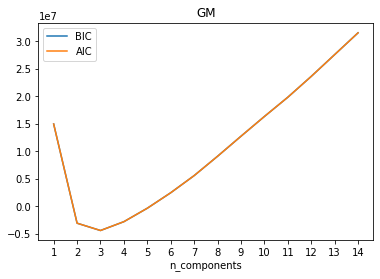

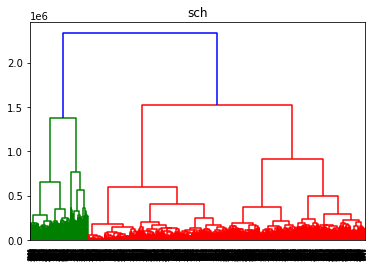

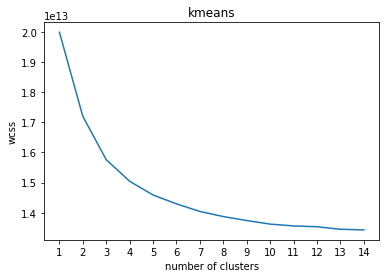

In [ ]:
#clustering
import numpy as np
from sklearn.mixture import GaussianMixture as GM
import matplotlib.pyplot as plt

n_components=np.arange(1,15)
review_data=[]
for i in df_clustering.reviewToken:
  review_data.append(i)
review_data=np.array(review_data)
ems=[GM(n_components=n, covariance_type='full', random_state=0).fit(review_data) for n in n_components]
plt.figure()
plt.plot(n_components, [em.bic(review_data) for em in ems], label='BIC')
plt.plot(n_components, [em.bic(review_data) for em in ems], label='AIC')
plt.xticks(ticks=n_components)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GM')

import scipy.cluster.hierarchy as sch
plt.figure()
dendrogram=sch.dendrogram(sch.linkage(review_data, method='ward'))
plt.title('sch')

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(review_data)
  wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,15), wcss)
plt.title('kmeans')
plt.xlabel('number of clusters')
plt.xticks(ticks=range(1,15))
plt.ylabel('wcss')

In [ ]:
from sklearn.cluster import AgglomerativeClustering as Agg
from sklearn import metrics
kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit(review_data)
kmeans_label=kmeans.predict(review_data)
df_clustering['kmeans_label']=kmeans_label

em=GM(n_components=3, covariance_type='full',random_state=1)
em.fit(review_data)
em_label=em.predict(review_data)
df_clustering['em_label']=em_label

hier=Agg(n_clusters=3, affinity='euclidean', linkage='ward')
hier.fit(review_data)
hier_label=hier.fit_predict(review_data)
df_clustering['hier_label']=hier_label


labels=['kmeans_label','em_label','hier_label']
score=dict()
def Silhouette(label_i):
  silhouette=metrics.silhouette_score(review_data, df_clustering[label_i], metric='euclidean')
  print(f'Silhouette of {label_i}: {silhouette}')
  score[label_i]=silhouette
  return score

for label in labels:
  Silhouette(label)

df_clustering.head()


Silhouette of kmeans_label: 0.21931352388652736
Silhouette of em_label: 0.22740293923313934
Silhouette of hier_label: 0.12207216661755024


,userid,review,clean_review,reviewToken,kmeans_label,em_label,hier_label
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...,used jane iredale 10 year love product say enough jane iredale product used five year recommende...,"[101, 2109, 4869, 20868, 11960, 2571, 2184, 2095, 2293, 4031, 2360, 2438, 4869, 20868, 11960, 25...",1,0,1
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...,skin feel amazing first full day using im love im glad bought last long time wished kit bought s...,"[101, 3096, 2514, 6429, 2034, 2440, 2154, 2478, 10047, 2293, 10047, 5580, 4149, 2197, 2146, 2051...",1,0,1
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...,color nice stay long time unlike polish tried would definitely buy color nice stay long time unl...,"[101, 3609, 3835, 2994, 2146, 2051, 4406, 3907, 2699, 2052, 5791, 4965, 3609, 3835, 2994, 2146, ...",0,1,1
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,got sample stuff order derby extra blade normally use art shaving pre shave oil along aos shavin...,"[101, 2288, 7099, 4933, 2344, 7350, 4469, 6085, 5373, 2224, 2396, 21146, 6455, 3653, 27545, 3514...",1,0,1
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...,great night cream perfect mask love spray face neck little refresher great night cream perfect m...,"[101, 2307, 2305, 6949, 3819, 7308, 2293, 12509, 2227, 3300, 2210, 25416, 21898, 2121, 2307, 230...",0,1,2


In [ ]:

with open('/content/drive/MyDrive/project5125/orignalData.csv', 'a') as f:
    df_clustering.to_csv(f, header=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'hier')

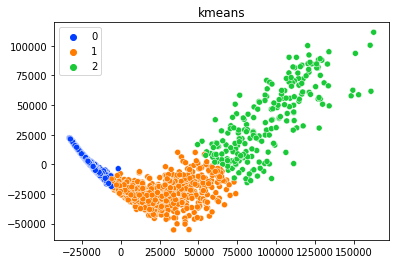

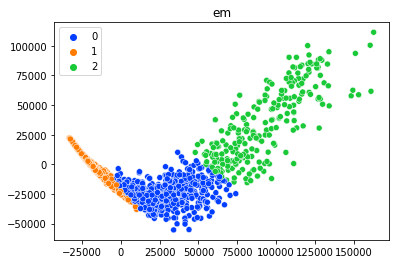

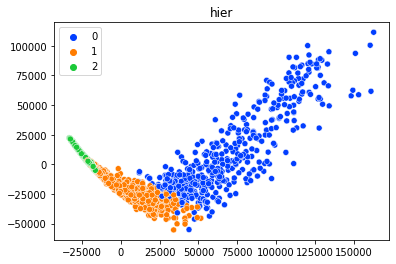

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
pca=PCA(n_components=2)
review_data_plt=pca.fit_transform(review_data)

plt.figure()
palette = sns.color_palette('bright', len(set(kmeans_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=kmeans_label, legend='full', palette=palette)
plt.title('kmeans')

plt.figure()
palette = sns.color_palette('bright', len(set(em_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=em_label, legend='full', palette=palette)
plt.title('em')

plt.figure()
palette = sns.color_palette('bright', len(set(hier_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=hier_label, legend='full', palette=palette)
plt.title('hier')


In [ ]:
clustering ={'userID': list(df_clustering.userid),
             'clustering': list(df_clustering.em_label)}
df_=pd.DataFrame(clustering)
df_.head()
df_.shape

(2750, 2)

In [ ]:
rating_dict = {'userID': list(df.reviewerID),
               'itemID': list(df.asin),
               'rating': list(df.overall)}
df2 = pd.DataFrame(rating_dict)
df2.shape


(17750, 3)

In [ ]:
df3=df2.join(df_.set_index('userID'), on='userID')
df3.head()
df3.shape
#同一个clustering 的 dataframe( userID, itemID, rating) 当作 data 送进训练库


(17750, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'rating')

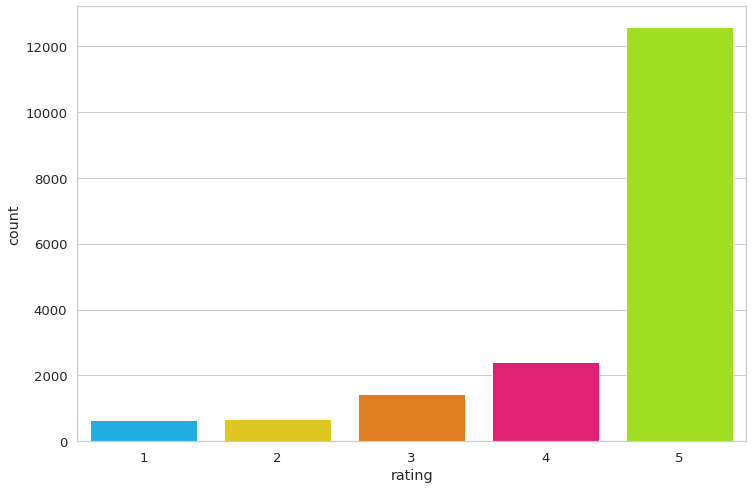

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors=['#01BEFE','#FFDD00', '#FF7D00', '#FF006D','#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(colors))
rcParams['figure.figsize']=12,8
sns.countplot(df2.rating)
plt.xlabel('rating')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


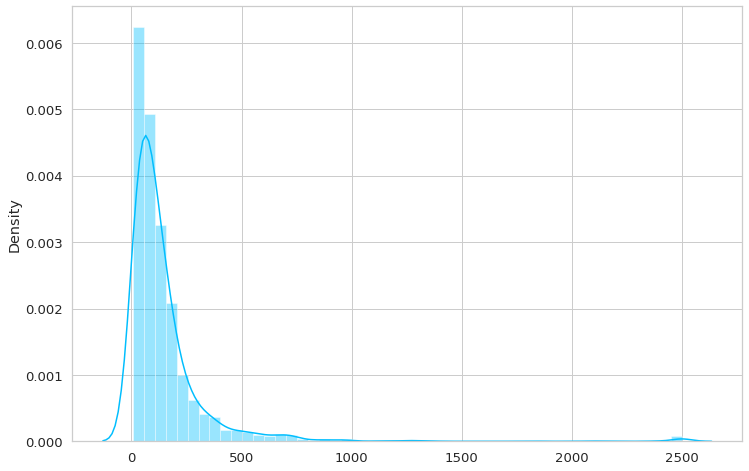

In [ ]:
token_lens=[]
for txt in df_clustering.clean_review:
  tokens = tokenizer.encode(txt, max_length=2500,truncation=True)
  token_lens.append(len(tokens))
sns.distplot(token_lens)

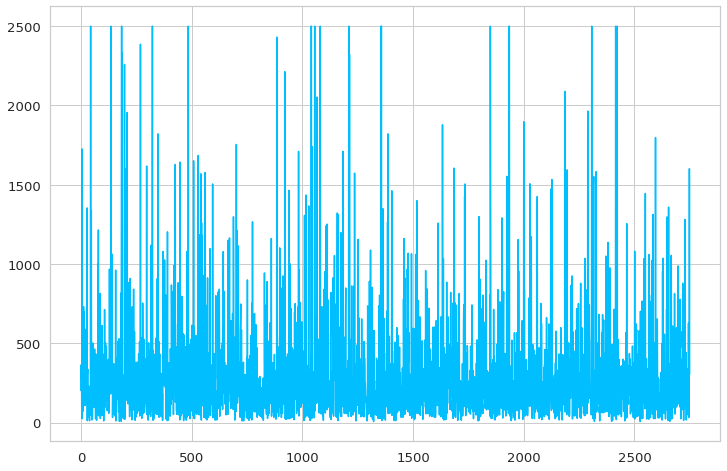

In [ ]:
plt.figure()
plt.plot(range(len(token_lens)), token_lens)

In [ ]:
from numpy import *
mean(token_lens)

308.7901818181818

In [ ]:
benchmark = []
from surprise import SVD, NMF, NormalPredictor, KNNBasic
from surprise.model_selection import KFold, cross_validate
from surprise import Reader
from surprise import Dataset

data_ = Dataset.load_from_df(df3[df3['clustering']!=4].iloc[:,0:3], Reader())
data0 = Dataset.load_from_df(df3[df3['clustering']==0].iloc[:,0:3], Reader())
data1 = Dataset.load_from_df(df3[df3['clustering']==1].iloc[:,0:3], Reader())
data2 = Dataset.load_from_df(df3[df3['clustering']==2].iloc[:,0:3], Reader())
i=0
algos={}
datasets_name=['nonclustering','clustering0','clustering1','clustering2']
for data in [data_, data0, data1, data2]:
  algo_best=None
  for algo in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    result = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    name=str(algo).split(' ')[0].split('.')[-1]+'_'+datasets_name[i]
    tmp = tmp.append(pd.Series([name], index=['algo']))
    if algo_best==None:
      algo_best = tmp['test_rmse']
      algos[datasets_name[i]]=[round(tmp['test_rmse'],3), algo, name]
    elif tmp['test_rmse'] < algo_best:
      algos[datasets_name[i]]=[round(tmp['test_rmse'],3), algo,name]
    benchmark.append(tmp)
  i=i+1

print(algos)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'nonclustering': [0.803, <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fa80e5c7f90>, 'SVD_noncluste

In [ ]:
surprise_results= pd.DataFrame(benchmark).set_index('algo')
surprise_results

,test_rmse,fit_time,test_time
algo,,,
SVD_nonclustering,0.803130,0.746275,0.053413
NMF_nonclustering,0.912886,1.125443,0.043981
NormalPredictor_nonclustering,1.320696,0.021036,0.046032
KNNBasic_nonclustering,0.822053,0.328677,0.931813
SVD_clustering0,0.924776,0.200469,0.012655
NMF_clustering0,1.043022,0.323407,0.010913
NormalPredictor_clustering0,1.443609,0.005175,0.012575
KNNBasic_clustering0,0.922076,0.021654,0.096560
SVD_clustering1,0.811840,0.416605,0.026379


In [ ]:
with open('/content/drive/MyDrive/project5125/orignalData.csv', 'a') as f:
    surprise_results.to_csv(f, header=True)


In [ ]:
surprise_results= pd.DataFrame(benchmark).set_index('algo').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
algo,,,
SVD_clustering2,0.700191,0.120559,0.007728
KNNBasic_clustering2,0.708896,0.016942,0.207400
NMF_clustering2,0.792334,0.166376,0.011046
SVD_nonclustering,0.803130,0.746275,0.053413
SVD_clustering1,0.811840,0.416605,0.026379
KNNBasic_clustering1,0.820872,0.096802,0.294572
KNNBasic_nonclustering,0.822053,0.328677,0.931813
NMF_nonclustering,0.912886,1.125443,0.043981
KNNBasic_clustering0,0.922076,0.021654,0.096560


In [ ]:
'''
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
algo=SVD()
prediction=algo.fit(trainset).test(testset)
accuracy.rmse(prediction) 
'为什么要算这个？'
'''

"\nfrom surprise.model_selection import train_test_split, GridSearchCV\nfrom surprise import accuracy\ntrainset, testset = train_test_split(data, test_size=0.25)\nalgo=SVD()\nprediction=algo.fit(trainset).test(testset)\naccuracy.rmse(prediction) \n'为什么要算这个？'\n"

In [ ]:
from collections import defaultdict

def get_n_predictions(predictions,n):
  topN = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    topN[uid].append((iid, est))

  for uid, user_ratings in topN.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    topN[uid]=user_ratings[:n]
  
  return topN

In [ ]:
from surprise import accuracy
n=5
values=list(algos.values())
datasets=[data_, data0, data1, data2]
topN_clustering={}
for i in range(len(datasets)):
  data=datasets[i]
  algo_best=values[i][1]
  trainset = data.build_full_trainset() 
  algo_best.fit(trainset)
  testset = trainset.build_anti_testset()
  predictions = algo_best.test(testset)
  print(f'length of prediction:{len(predictions)}')
  #score=accuracy.rmse(predictions)
  #print(f'rmse for {values[i][2]} is: {score}')
  topN=get_n_predictions(predictions, n)
  print(f'len of topN is {len(topN)}')
  if i==0:
    topN0=topN
    #topN= sorted(topN.items(), key=lambda x:x[0]) 
    print(f'top{n} for non_clustering dataset is: {topN}')
    print(len(topN))
  else:
    topN_clustering.update(topN)
#topN_clustering= sorted(topN_clustering.items(), key=lambda x:x[0]) 
print(f'top{n} for clustering dataset is: {topN_clustering}')
print(len(topN_clustering))
    
  

length of prediction:3295458
len of topN is 2750
top5 for non_clustering dataset is: defaultdict(<class 'list'>, {'A2HOI48JK8838M': [('B00175YVNO', 4.795123534428072), ('B0009EXM52', 4.781273862452799), ('B000YBNL2Y', 4.779980268201053), ('B004N2SQUC', 4.721807386556412), ('B000068DWY', 4.709989372811896)], 'A1YIPEY7HX73S7': [('B0001EL9BO', 5), ('B0006PJSES', 5), ('B0007CXYAE', 5), ('B0007M11XQ', 5), ('B000CNTT9I', 5)], 'A2QCGHIJ2TCLVP': [('B000VNIZGM', 5), ('B0012SI2EU', 5), ('B0015VN6V8', 5), ('B00175YVNO', 5), ('B006TH5DUK', 5)], 'A2R4UNHFJBA6PY': [('B0001EL9BO', 5), ('B0007M11XQ', 5), ('B000J10II4', 5), ('B0012SI2EU', 5), ('B0014DUXNG', 5)], 'A1606LA683WZZU': [('B0001EL9BO', 5), ('B0007M11XQ', 5), ('B000GSTHZU', 5), ('B000J10II4', 5), ('B000ULD9XE', 5)], 'A3R0NQ9E53JHYQ': [('B000BOCRVA', 5), ('B000VNIZGM', 5), ('B00110S3GG', 5), ('B0012SI2EU', 5), ('B0014F812E', 5)], 'A35YXEDATMIJ9S': [('B00175YVNO', 5), ('B000BOCRVA', 4.969577092300021), ('B0001EL9BO', 4.932894304259758), ('B000J1

In [ ]:
#[('A0488385844WNV2OWO9X', [('B00004U9V2', 5), ('B000068DWY', 5), ('B0001EL9BO', 5), ('B0001XDU2Q', 5), ('B0006FMQWO', 5)])..]
#[('A0488385844WNV2OWO9X', [('B00005V50B', 5), ('B0001EL9BO', 5), ('B0002H842C', 5), ('B0002ZW5UQ', 5), ('B0009DVDTU', 5)])..]
# total distinct userid: 2750

userid='A0488385844WNV2OWO9X'
def get_recommendation_score(userid):
  return (topN0[userid], topN_clustering[userid])

def get_recommendation(userid):
  r1=[]
  r2=[]
  for i in range(len(topN0[userid])):
    r1.append(topN0[userid][i][0])
  for i in range(len(topN_clustering[userid])):
    r2.append(topN_clustering[userid][i][0])
  return (r1,r2)

recommendation_nonclustering, recommendation_clustering = get_recommendation(userid)
print(f'recommendation_nonclustering is:{recommendation_nonclustering}')
print(f'recommendation_clustering is: {recommendation_clustering}')

recommendation_nonclustering is:['B00004U9V2', 'B0001433OU', 'B0001EL9BO', 'B0002ZW5UQ', 'B0007M11XQ']
recommendation_clustering is: ['B00005V50B', 'B0001EL9BO', 'B0002H842C', 'B0002ZW5UQ', 'B0009DVDTU']


In [ ]:
#df_condition=df_clustering[df_clustering['em_label'==0]]
#series=df.groupby('reviewerID').apply(lambda x: '.'.join(x['reviewText']))
def wordlist(df_condition):
  word_list=[]
  for i in df_condition.clean_review:
    word_list.extend(i.split())
  return word_list


In [ ]:
#df_condition=df_clustering[df_clustering['em_label'==0]]
wordlist_clustering0=wordlist(df_clustering[df_clustering['em_label']==0])
wordlist_clustering2=wordlist(df_clustering[df_clustering['em_label']==2])
wordlist_nonclustering=wordlist(df_clustering[df_clustering['em_label']>0])
print(wordlist_clustering0[1:10])

['jane', 'iredale', '10', 'year', 'love', 'product', 'say', 'enough', 'jane']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


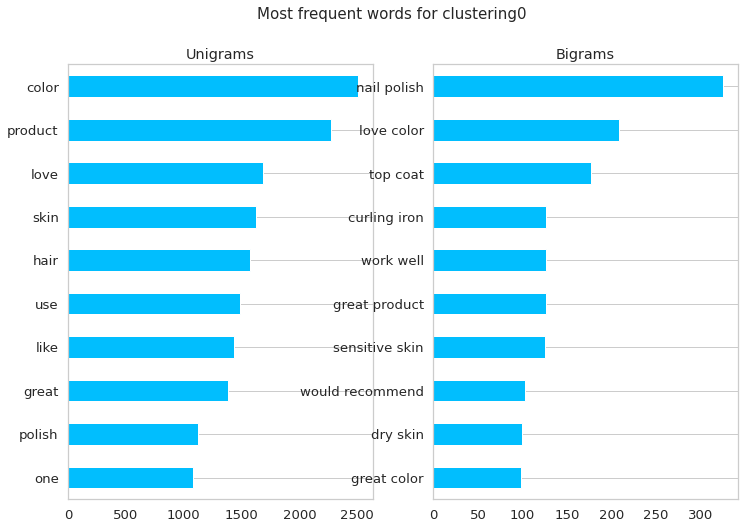

In [ ]:
#word-frequency
top=10
nltk.download('punkt')
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for clustering0", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(wordlist_clustering0)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(wordlist_clustering0, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


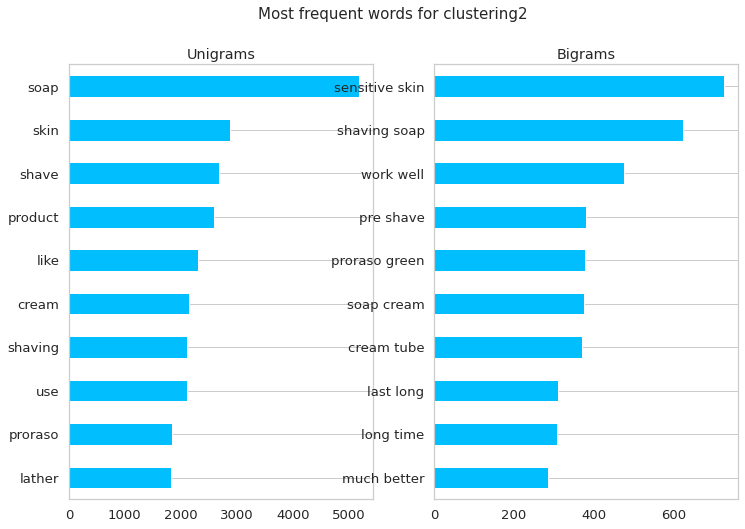

In [ ]:
#word-frequency
top=10
nltk.download('punkt')
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for clustering2", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(wordlist_clustering2)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(wordlist_clustering2, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


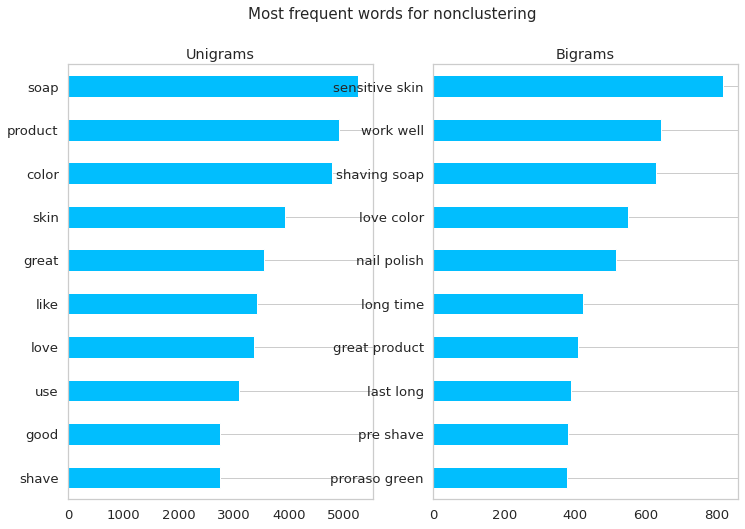

In [ ]:
#word-frequency
top=10
nltk.download('punkt')
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for nonclustering", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(wordlist_nonclustering)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(wordlist_nonclustering, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [ ]:
#scrapping for image&title
'''
recommendation_nonclustering is:['B000068DWY', 'B0001EL9BO', 'B00021AMZK', 'B00021CDQ6', 'B0007M11XQ']
recommendation_clustering is: ['B0001EL9BO', 'B0007M11XQ', 'B000IOATJU', 'B000PHTC20', 'B000YBIOB2']

" data-old-hires="https://images-na.ssl-images-amazon.com/images/I/61s4PEW2%2BCL._SL1000_.jpg" 
<img alt="OPI Nail Lacquer, Red Nail Polish, 0.5 fl oz" src="
data:image/webp;base64,UklGRrQVAABXRUJQVlA4IKgVAABweQCdASpWAVY
'''
!pip install beautifulsoup4

In [1]:
import bs4
import re
from bs4 import BeautifulSoup
import requests
#https://www.amazon.com/dp/[asin]

index=['B000068DWY', 'B0001EL9BO', 'B00021AMZK', 'B00021CDQ6', 'B0007M11XQ']
url = "https://www.amazon.com/dp/B000068DWY"
#kv={'user-agent': 'Mozilla/5.0'}
#response = requests.get(url, headers=kv)
response = requests.get(url)
response.encoding=response.apparent_encoding
#print(response.text)
response.status_code

503

In [ ]:
response.request.headers

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}